In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [ ]:
pip install pandas numpy scipy scikit-learn matplotlib seaborn


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HistoricalData_1741898709939.csv to HistoricalData_1741898709939.csv


In [ ]:
data = pd.read_csv('HistoricalData_1741898709939.csv')
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,03/12/2025,$216.98,62547470,$220.14,$221.75,$214.91
1,03/11/2025,$220.84,76137410,$223.805,$225.8399,$217.45
2,03/10/2025,$227.48,72071200,$235.54,$236.16,$224.22
3,03/07/2025,$239.07,46273570,$235.105,$241.37,$234.76
4,03/06/2025,$235.33,45170420,$234.435,$237.86,$233.1581


In [ ]:
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

duplicate_count = data.duplicated().sum()
print(f"Duplicate rows: {duplicate_count}")
# Optionally remove duplicates
data = data.drop_duplicates()

summary = data.describe()
print("Statistical summary:")
print(summary)



Missing values per column:
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64
Duplicate rows: 0
Statistical summary:
             Volume
count  2.515000e+03
mean   1.131585e+08
std    6.536536e+07
min    2.323471e+07
25%    6.927758e+07
50%    9.757607e+07
75%    1.376138e+08
max    6.475300e+08


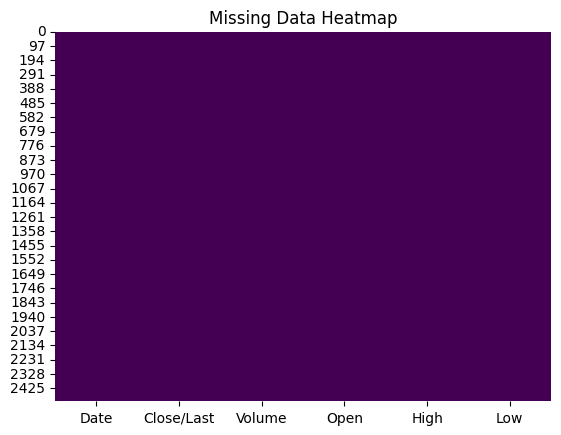

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


In [ ]:
# Remove rows with missing values (for bootstrapping)
clean_data = data.dropna()

# Resample clean_data to create a synthetic dataset with the same number of rows
synthetic_data = clean_data.sample(n=len(clean_data), replace=True)

# Check that the synthetic dataset has similar statistical properties
print(synthetic_data.describe())


             Volume
count  2.515000e+03
mean   1.124608e+08
std    6.605131e+07
min    2.726298e+07
25%    6.905920e+07
50%    9.604190e+07
75%    1.348883e+08
max    6.475300e+08


In [ ]:
report_content = f"""
Data Quality Report:

Missing Values per Column:
{missing_values.to_string()}

Duplicate Rows: {duplicate_count}

Statistical Summary:
{summary.to_string()}
"""

with open('data_quality_report.txt', 'w') as file:
    file.write(report_content)

print("Report generated as 'data_quality_report.txt'.")


Report generated as 'data_quality_report.txt'.


In [ ]:
file_path = pd.read_csv('HistoricalData_1741898709939.csv')
class DataQualityTool:
    def __init__(self, file_path ):
        self.data = file_path

    def check_missing(self):
        return self.data.isnull().sum()

    def check_duplicates(self):
        return self.data.duplicated().sum()

    def get_summary(self):
        return self.data.describe()

    def bootstrap_data(self):
        clean_data = self.data.dropna()
        return clean_data.sample(n=len(clean_data), replace=True)

    def generate_report(self, report_filename='report.txt'):
        missing = self.check_missing()
        duplicates = self.check_duplicates()
        summary = self.get_summary()
        synthetic = self.bootstrap_data()

        report = f"Missing Values:\n{missing}\n\nDuplicates: {duplicates}\n\nSummary:\n{summary}\n\nSynthetic Data Summary:\n{synthetic.describe()}"

        with open(report_filename, 'w') as f:
            f.write(report)
        print(f"Report generated as {report_filename}")

# Usage example:
dq_tool = DataQualityTool('your_dataset.csv')
dq_tool.generate_report()


AttributeError: 'str' object has no attribute 'isnull'

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

class DataQualityTool:
    def __init__(self, file_path):
        """
        Constructor: Loads data from a CSV file.

        Parameters:
        - file_path (str): The path to the CSV file containing your dataset.
        """
        # Load the dataset from the given file path and store it in an instance variable.
        self.data = pd.read_csv('HistoricalData_1741898709939.csv')

    def check_missing(self):
        """
        Check for missing values in the dataset.

        Returns:
        - A pandas Series showing the count of missing values in each column.
        """
        return self.data.isnull().sum()

    def check_duplicates(self):
        """
        Check for duplicate rows in the dataset.

        Returns:
        - An integer count of duplicate rows.
        """
        return self.data.duplicated().sum()

    def get_summary(self):
        """
        Get basic statistical summary of the dataset.

        Returns:
        - A pandas DataFrame containing summary statistics.
        """
        return self.data.describe()

    def bootstrap_data(self):
        """
        Generate a synthetic dataset by bootstrapping.
        The process:
          1. Drops rows with missing values.
          2. Samples with replacement to generate a new dataset
             with the same number of rows as the cleaned data.

        Returns:
        - A pandas DataFrame representing the bootstrapped dataset.
        """
        clean_data = self.data.dropna()
        return clean_data.sample(n=len(clean_data), replace=True)

    def generate_report(self, report_filename='report.txt'):
        """
        Generate a report that summarizes the data quality metrics.

        Parameters:
        - report_filename (str): The filename for saving the report.

        The report includes:
          - Missing values per column.
          - Count of duplicate rows.
          - Statistical summary of the dataset.
          - Statistical summary of the bootstrapped (synthetic) dataset.
        """
        missing = self.check_missing()
        duplicates = self.check_duplicates()
        summary = self.get_summary()
        synthetic = self.bootstrap_data()

        # Create a report string using the computed metrics.
        report = (
            "Data Quality Report\n\n"
            "Missing Values per Column:\n" + missing.to_string() + "\n\n"
            f"Duplicate Rows: {duplicates}\n\n"
            "Statistical Summary:\n" + summary.to_string() + "\n\n"
            "Synthetic Data Summary:\n" + synthetic.describe().to_string()
        )

        # Write the report to a text file.
        with open(report_filename, 'w') as f:
            f.write(report)
        print(f"Report generated as {report_filename}")

# Usage Example:
if __name__ == '__main__':
    # Replace 'your_dataset.csv' with the actual path to your dataset file.
    dq_tool = DataQualityTool('your_dataset.csv')
    dq_tool.generate_report()


Report generated as report.txt


In [ ]:
with open('report.txt', 'r') as file:
    content = file.read()
    print(content)



Data Quality Report

Missing Values per Column:
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0

Duplicate Rows: 0

Statistical Summary:
             Volume
count  2.515000e+03
mean   1.131585e+08
std    6.536536e+07
min    2.323471e+07
25%    6.927758e+07
50%    9.757607e+07
75%    1.376138e+08
max    6.475300e+08

Synthetic Data Summary:
             Volume
count  2.515000e+03
mean   1.154672e+08
std    6.750152e+07
min    2.323471e+07
25%    7.062210e+07
50%    9.893191e+07
75%    1.414170e+08
max    6.475300e+08
